# PRINCIPAL COMPONENT ANALYSIS-UNSUPERVISED TECHNIQUE OF LEARNING

In [46]:
import numpy as np
from sklearn.datasets import load_wine

In [117]:
data=load_wine()

In [118]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [122]:
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [143]:
x=pd.DataFrame(data.data,columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])
y=data.target

In [147]:
x.head()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [148]:
#step 1-scale the data by StandardScaler() __>it will standardize the data which means it will transform the data in which mean as 0 and std as 1 or it will data is equally distributed in all the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(x)


In [130]:
#step 2-find covariance matrix

In [131]:
feature=scaled_x.T
covariance_mat=np.cov(feature)
covariance_mat[:2]
feature

array([[ 1.51861254,  0.24628963,  0.19687903, ...,  0.33275817,
         0.20923168,  1.39508604],
       [-0.5622498 , -0.49941338,  0.02123125, ...,  1.74474449,
         0.22769377,  1.58316512],
       [ 0.23205254, -0.82799632,  1.10933436, ..., -0.38935541,
         0.01273209,  1.36520822],
       ...,
       [ 0.36217728,  0.40605066,  0.31830389, ..., -1.61212515,
        -1.56825176, -1.52437837],
       [ 1.84791957,  1.1134493 ,  0.78858745, ..., -1.48544548,
        -1.40069891, -1.42894777],
       [ 1.01300893,  0.96524152,  1.39514818, ...,  0.28057537,
         0.29649784, -0.59516041]])

In [132]:
#step3-->converting sqr matrix into eigen values and eigen vectors

In [133]:
eig_val,eig_vec=np.linalg.eig(covariance_mat)
print(eig_val)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


In [134]:
eig_vec

array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  , -0.13075693, -0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [135]:
explained_variance=[]
for i in range(len(eig_val)):
    explained_variance.append(eig_val[i]/np.sum(eig_val))
print( "explained_variance=={}% \n array representing explained variance=={}".format(np.sum(explained_variance)*100,explained_variance))

explained_variance==99.99999999999999% 
 array representing explained variance==[0.3619884809992635, 0.19207490257008905, 0.11123630536249998, 0.07069030182714033, 0.06563293679648598, 0.049358233192225646, 0.04238679322623317, 0.00795214889899456, 0.02680748948378868, 0.01298232575604213, 0.022221534047897062, 0.017368356899899177, 0.019300190939440777]


In [136]:
#visualisation part

In [137]:
projected1=scaled_x.dot(eig_vec.T[0])
projected2=scaled_x.dot(eig_vec.T[1])
result=pd.DataFrame(projected1,columns=["pc1"])
result["pc2"]=projected2
result["y"]=y
result.head()

,pc1,pc2,y
0,-3.316751,1.443463,0
1,-2.209465,-0.333393,0
2,-2.516740,1.031151,0
3,-3.757066,2.756372,0
4,-1.008908,0.869831,0


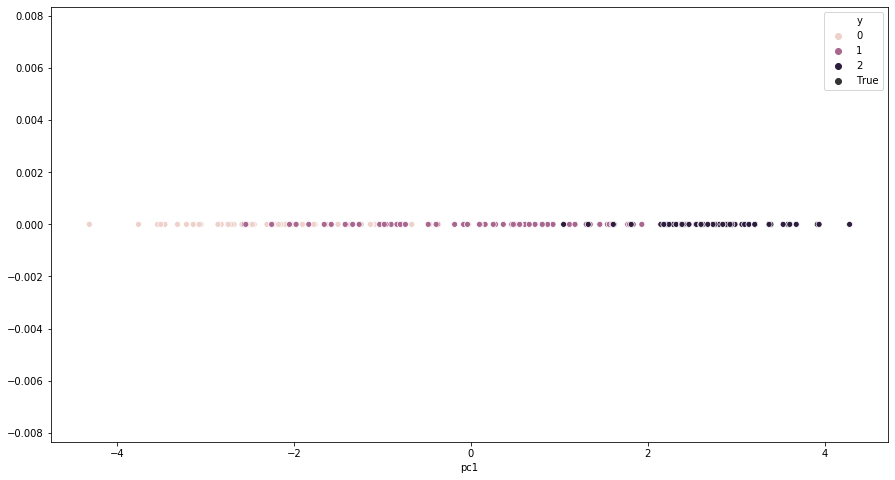

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(result["pc1"],[0]*len(result),hue=result["y"],style=True)